In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [25]:
data_folder_path = Path('../../data/')
print(os.listdir(data_folder_path))

['chordonomicon_raw.csv', 'final_test.csv', 'matrix_expanded_final_train.csv', 'density_expanded_final_train.csv', 'data_train_continuous_data.csv', 'spotify_final.csv', 'final_train.csv']


In [26]:
data_all = pd.read_csv(data_folder_path / 'data_train_continuous_data.csv')
print(data_all.columns)

Index(['chords_x', 'simplified_chords_x', 'spotify_song_id', 'chords_y',
       'missing_notes', 'simplified_chords_y', 'drone_ratio',
       'average_overlap', 'average_2overlap', 'average_3overlap',
       'average_4overlap', 'average_5overlap', 'maj_triad_ratio',
       'min_triad_ratio', 'chords', 'unique_5gram_density',
       'unique_chord_density', 'simplified_chords', 'decade', 'main_genre',
       'spotify_track_id', 'spotify_artist_id', 'spotify_success',
       'spotify_track_name', 'spotify_artists', 'spotify_album_name',
       'spotify_release_date', 'spotify_popularity', 'spotify_duration_ms',
       'spotify_artist_name', 'spotify_genres', 'spotify_artist_popularity',
       'spotify_followers'],
      dtype='object')


In [27]:
# Identify target and predictor variables
target_variables_list = ['decade', 'main_genre', 'spotify_popularity']
predictor_variables_list = [
    'drone_ratio',
    'average_overlap',
    'average_2overlap',
    'average_3overlap',
    'average_4overlap',
    'average_5overlap',
    'maj_triad_ratio',
    'min_triad_ratio',
    'unique_5gram_density',
    'unique_chord_density'
]

In [28]:
# Check missing values in target variables
print("Missing values in target variables:")
print(data_all[target_variables_list].isnull().sum())
print("\nMissing values in predictor variables:")
print(data_all[predictor_variables_list].isnull().sum())

Missing values in target variables:
decade                    0
main_genre                0
spotify_popularity    73498
dtype: int64

Missing values in predictor variables:
drone_ratio             0
average_overlap         0
average_2overlap        0
average_3overlap        0
average_4overlap        0
average_5overlap        0
maj_triad_ratio         0
min_triad_ratio         0
unique_5gram_density    0
unique_chord_density    0
dtype: int64


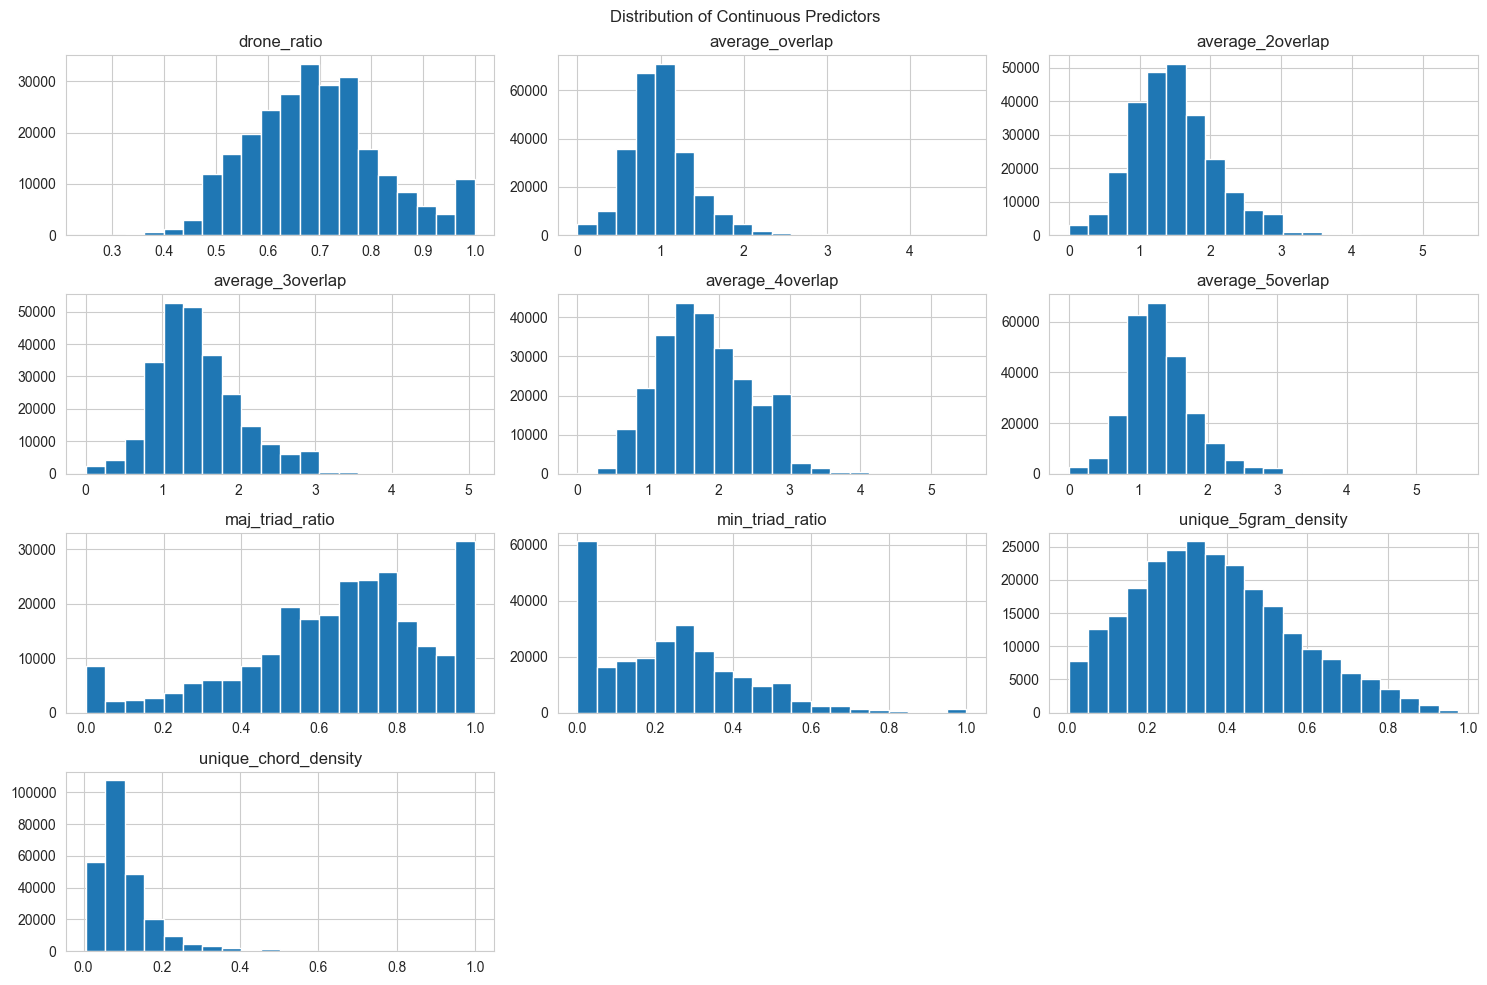

In [29]:
# Get predictor variables as a DataFrame
predictors = data_all[predictor_variables_list]

# Create histograms
predictors.hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Continuous Predictors")
plt.tight_layout()
plt.show()

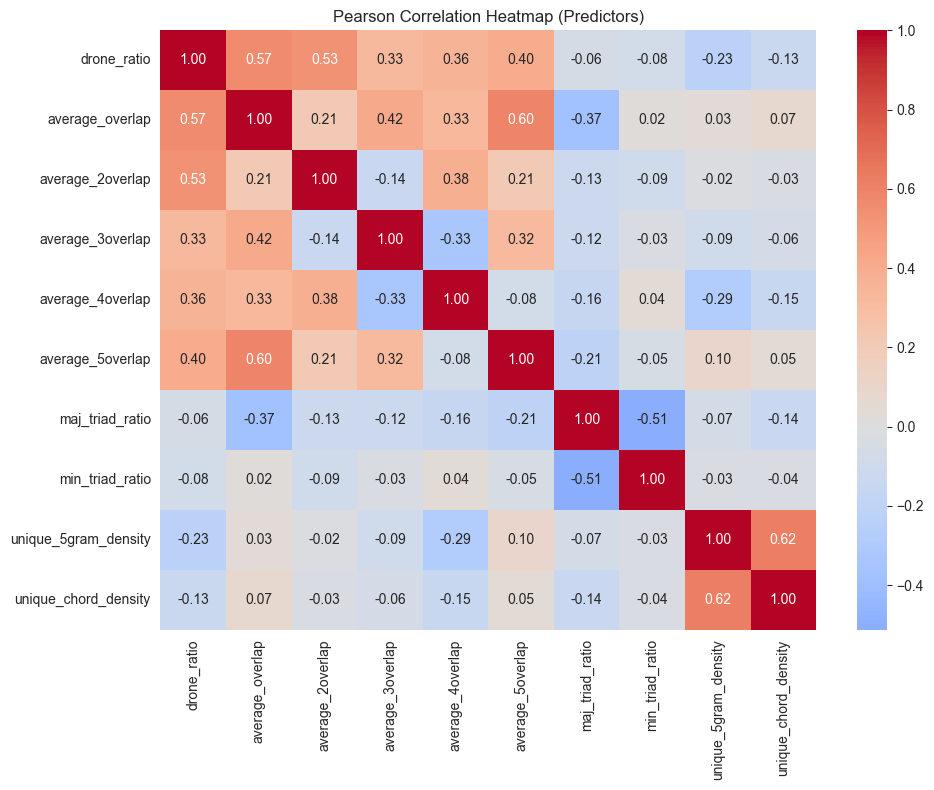

In [30]:
# Calculate correlation matrix
corr_matrix = predictors.corr(method='pearson')

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt='.2f')
plt.title("Pearson Correlation Heatmap (Predictors)")
plt.tight_layout()
plt.show()

In [31]:
# Detect multicollinearity
threshold = 0.9
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr_pairs = [(i, j) for i, j in corr_pairs.index if i != j and corr_matrix.loc[i, j] > threshold]

# Remove duplicates (e.g., (A,B) and (B,A))
high_corr_pairs = list(set(tuple(sorted(pair)) for pair in high_corr_pairs))

print("\nHighly correlated pairs (>0.9):")
if high_corr_pairs:
    for pair in high_corr_pairs:
        print(f"{pair[0]} - {pair[1]}: {corr_matrix.loc[pair[0], pair[1]]:.3f}")
else:
    print("No highly correlated pairs found.")


Highly correlated pairs (>0.9):
No highly correlated pairs found.
